# DBSCAN algorithm
- Read the data file
- Preprocess
    - Scale
    - Normalize
- Perform PCA to reduce dimentionality of data
- Perform nearest neighbors
- Perform DBSCAN
- get labels
- scatter plot of cluters

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Preprocessing
X = pd.read_csv('CreditCard_data.csv') 
  
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

In [9]:
print(type(X))
len(X)

<class 'pandas.core.frame.DataFrame'>


8950

In [10]:
X.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
# Scaling the data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) # fit the data in particular range
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

In [12]:
print(type(X_normalized))
X_normalized.shape

<class 'numpy.ndarray'>


(8950, 17)

In [13]:
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

X_normalized.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


### PCA (Principal Component Analysis)
- It is a statistical procedure that uses an (orthogonal) transformation which converts a set of correlated variables to a set of uncorrelated variables. 
- It is  widely used tool in exploratory data analysis and in ML for predictive models
- is an unsupervised statistical technique used to examine the interrelations among a set of variables

In [17]:
#Reducing the dimensionality of the Data

pca = PCA(n_components = 2) # 2 columns
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
# print(X_principal.head())
X_principal.columns = ['P1', 'P2'] # rename column

X_principal.head(5)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268877
3,-0.481657,-0.097609
4,-0.563512,-0.482506


In [18]:
X_principal.shape

(8950, 2)

In [19]:
from sklearn.neighbors import NearestNeighbors

In [20]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_normalized)
distances, indices = nbrs.kneighbors(X_normalized)

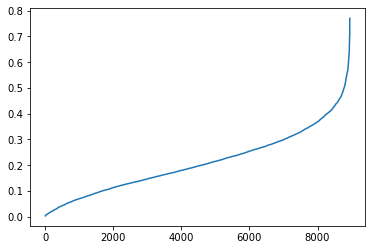

In [21]:
#sort and plot results

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

8950
[-1  0  1  2]


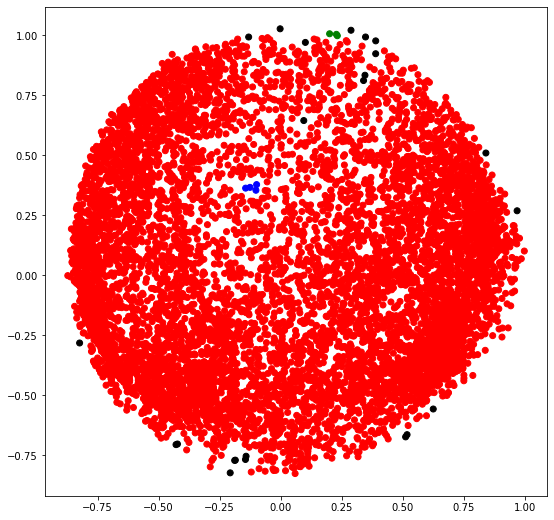

In [55]:
# Numpy array of all the cluster labels assigned to each data point 
# choosing eps=0.0375
db_temp = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_temp.labels_ 
print(len(labels))

uniq_vals = np.unique(labels)
print(uniq_vals)

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k' # noise we ignore it.
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels]

# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

plt.show() 

Matplotlib colors
    b : blue.
    g : green.
    r : red.
    c : cyan.
    m : magenta.
    y : yellow.
    k : black.
    w : white.

8950
[-1  0  1  2  3]


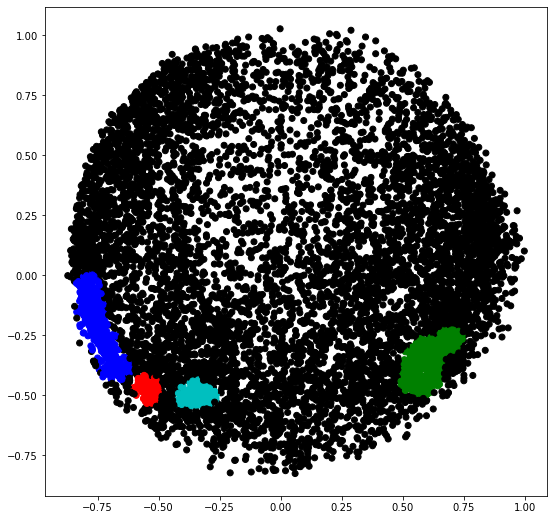

In [54]:
db = DBSCAN(eps = 0.0375, min_samples = 55).fit(X_principal) # next sample for 55
labels1 = db.labels_
print(len(labels1))

uniq_vals = np.unique(labels1)
print(uniq_vals)

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.show() 

[-1  0  1  2]


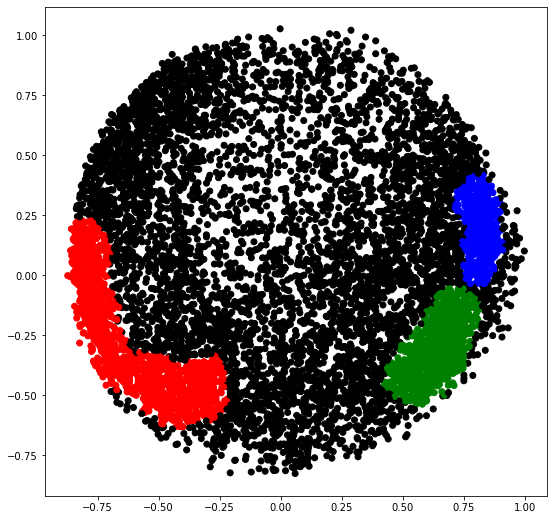

In [53]:
# play around it.
# eps is choose based on DISTANCES from NearestNeighbors.

db = DBSCAN(eps = 0.05, min_samples = 55).fit(X_principal)
labels1 = db.labels_
uniq_vals = np.unique(labels1)
print(uniq_vals)

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.show() 

In [ ]:
# This is a un-supervised learning, So we have to make decision on the eps and minPts.